In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('WeeklyNumberofDengueandDengueHaemorrhagicFeverCases.csv')
data.head()

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         530 non-null    int64  
 1   eweek        530 non-null    int64  
 2   type_dengue  530 non-null    object 
 3   number       522 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.7+ KB


In [3]:
data['eweek'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [4]:
data['year'].unique()

array([2014, 2015, 2016, 2017, 2018], dtype=int64)

In [5]:
data_dengue = data[data['type_dengue'] == 'Dengue']
data_DHF = data[data['type_dengue'] == 'DHF']
data_dengue.head()

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
2,2014,2,Dengue,479.0
4,2014,3,Dengue,401.0
6,2014,4,Dengue,336.0
8,2014,5,Dengue,234.0


<AxesSubplot: xlabel='year'>

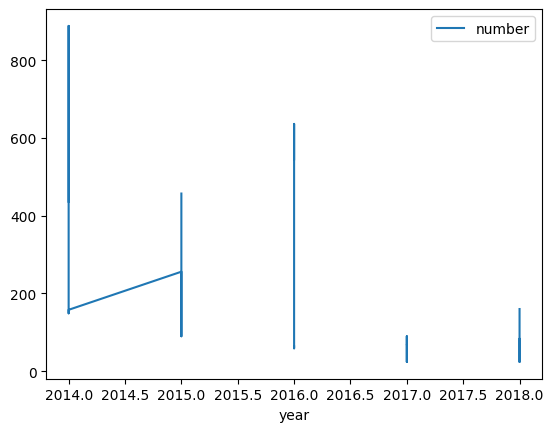

In [6]:
data_dengue.plot(x='year', y='number')

In [7]:
data_dengue['year-week'] = pd.to_datetime(data_dengue['year'].astype(str) + ' ' + data_dengue['eweek'].astype(str) + ' 3', format='%G %V %u')
data_dengue.head()

C:\Users\heziy\AppData\Local\Temp\ipykernel_17216\1619317450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dengue['year-week'] = pd.to_datetime(data_dengue['year'].astype(str) + ' ' + data_dengue['eweek'].astype(str) + ' 3', format='%G %V %u')


,year,eweek,type_dengue,number,year-week
0,2014,1,Dengue,436.0,2014-01-01
2,2014,2,Dengue,479.0,2014-01-08
4,2014,3,Dengue,401.0,2014-01-15
6,2014,4,Dengue,336.0,2014-01-22
8,2014,5,Dengue,234.0,2014-01-29


In [8]:
data_dengue_f = data_dengue[['year-week', 'number']]
data_dengue_f.set_index('year-week', inplace=True)
dengue_monthly = data_dengue_f.resample('M').sum()
dengue_monthly.head()

,number
year-week,
2014-01-31,1886.0
2014-02-28,1021.0
2014-03-31,868.0
2014-04-30,1252.0
2014-05-31,1435.0


In [9]:
trend_data = pd.read_csv('Denguefever_Timeline.csv')
trend_data.head()

,Category: All categories
Month,Dengue fever: (Singapore)
2004-01,0
2004-02,22
2004-03,20
2004-04,14


In [10]:
trend_data = trend_data.iloc[1:-1]
trend_data.rename(columns = {'Category: All categories':'records'}, inplace=True)

In [11]:
trend_data.head()

,records
2004-01,0
2004-02,22
2004-03,20
2004-04,14
2004-05,0


In [12]:
trend_data['records'] = trend_data['records'].astype(int)

<AxesSubplot: >

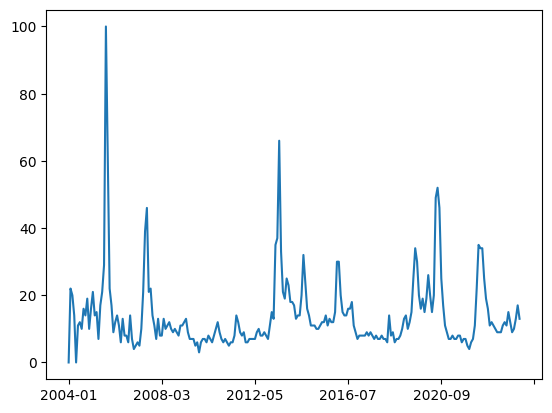

In [13]:
trend_data['records'].plot()

<AxesSubplot: xlabel='year-week'>

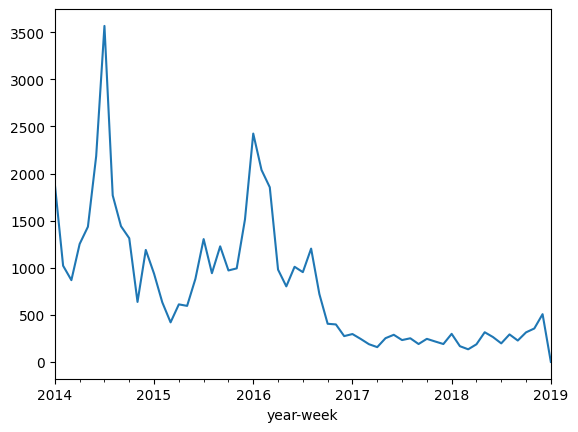

In [14]:
dengue_monthly['number'].plot()

<AxesSubplot: >

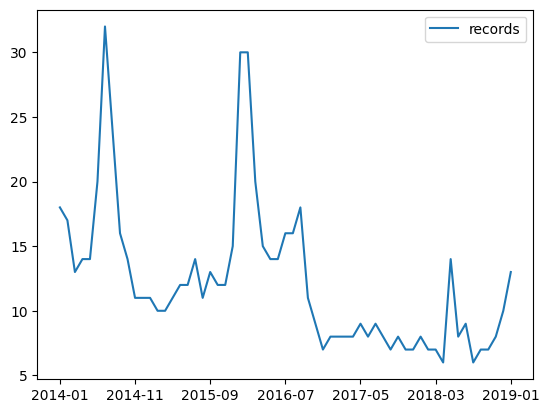

In [15]:
trend_data_f = trend_data['2014-01':'2019-01']
trend_data_f.plot()

<AxesSubplot: >

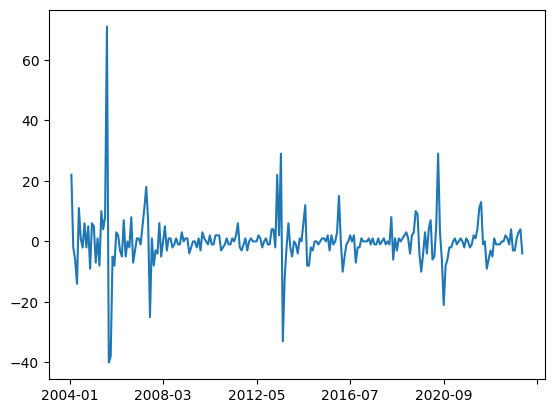

In [16]:
trend_data['records'].diff().plot()

<AxesSubplot: >

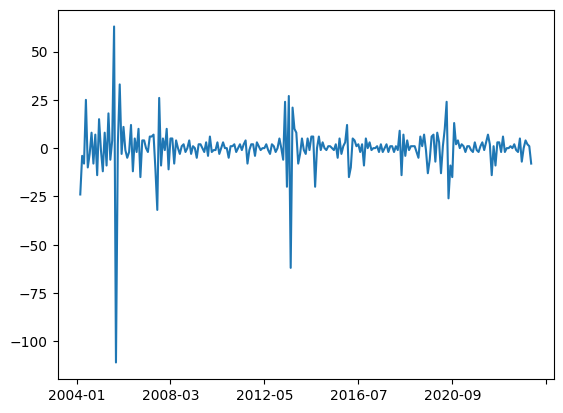

In [17]:
trend_data['records'].diff().diff().plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

adfuller(trend_data['records'])

(-6.915241433420514,
 1.1840829127403822e-09,
 1,
 241,
 {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 1578.878235697195)

p value looks small enough to me on the original data  
Second-ordered difference does not seem to offer much additional insight from first order 

In [19]:
adfuller(trend_data['records'].diff().dropna())

(-9.055077893335278,
 4.725484711813968e-15,
 5,
 236,
 {'1%': -3.4583663275730476,
  '5%': -2.8738660999177132,
  '10%': -2.5733390785693766},
 1600.083886719274)

p value gets even smaller with the first order difference data

The above leads to me explore the possibility of building an ARIMA model